# Rf 2 0 2_Extendedmlfit
Addition and convolution: setting up an extended maximum likelihood fit




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:43 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Set up component pdfs
---------------------------------------

Declare observable x

In [2]:
x = ROOT.RooRealVar("x", "x", 0, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and
their parameters

In [3]:
mean = ROOT.RooRealVar("mean", "mean of gaussians", 5)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 1)

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

Build Chebychev polynomial p.d.f.

In [4]:
a0 = ROOT.RooRealVar("a0", "a0", 0.5, 0., 1.)
a1 = ROOT.RooRealVar("a1", "a1", -0.2, 0., 1.)
bkg = ROOT.RooChebychev("bkg", "Background", x, ROOT.RooArgList(a0, a1))

Sum the signal components into a composite signal p.d.f.

In [5]:
sig1frac = ROOT.RooRealVar(
    "sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.)
sig = ROOT.RooAddPdf(
    "sig", "Signal", ROOT.RooArgList(sig1, sig2), ROOT.RooArgList(sig1frac))

Method 1 - Construct extended composite model
-------------------------------------------------------------------

Sum the composite signal and background into an extended pdf
nsig*sig+nbkg*bkg

In [6]:
nsig = ROOT.RooRealVar("nsig", "number of signal events", 500, 0., 10000)
nbkg = ROOT.RooRealVar(
    "nbkg", "number of background events", 500, 0, 10000)
model = ROOT.RooAddPdf(
    "model",
    "(g1+g2)+a",
    ROOT.RooArgList(
        bkg,
        sig),
    ROOT.RooArgList(
        nbkg,
        nsig))

Sample, fit and plot extended model
---------------------------------------------------------------------

Generate a data sample of expected number events in x from model
= model.expectedEvents() = nsig+nbkg

In [7]:
data = model.generate(ROOT.RooArgSet(x))

Fit model to data, ML term automatically included

In [8]:
model.fitTo(data)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig1,sig2)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 a1           0.00000e+00  1.00000e-01    0.00000e+00  1.00000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 BROUGHT BACK INSIDE LIMITS.
     3 n

Plot data and PDF overlaid, expected number of events for p.d.f projection normalization
rather than observed number of events (==data.numEntries())

In [9]:
xframe = x.frame(ROOT.RooFit.Title("extended ML fit example"))
data.plotOn(xframe)
model.plotOn(xframe, ROOT.RooFit.Normalization(
    1.0, ROOT.RooAbsReal.RelativeExpected))

<ROOT.RooPlot object ("frame_x_560eb733b780") at 0x560eb733b780>

Overlay the background component of model with a dashed line

In [10]:
ras_bkg = ROOT.RooArgSet(bkg)
model.plotOn(
    xframe, ROOT.RooFit.Components(ras_bkg), ROOT.RooFit.LineStyle(
        ROOT.kDashed), ROOT.RooFit.Normalization(
            1.0, ROOT.RooAbsReal.RelativeExpected))

<ROOT.RooPlot object ("frame_x_560eb733b780") at 0x560eb733b780>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Overlay the background+sig2 components of model with a dotted line

In [11]:
ras_bkg_sig2 = ROOT.RooArgSet(bkg, sig2)
model.plotOn(
    xframe, ROOT.RooFit.Components(ras_bkg_sig2), ROOT.RooFit.LineStyle(
        ROOT.kDotted), ROOT.RooFit.Normalization(
            1.0, ROOT.RooAbsReal.RelativeExpected))

<ROOT.RooPlot object ("frame_x_560eb733b780") at 0x560eb733b780>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (sig)


Print structure of composite p.d.f.

In [12]:
model.Print("t")

0x560eb6f85d40 RooAddPdf::model = 0.886051 [Auto,Dirty] 
  0x560eb6f2ad80/V- RooChebychev::bkg = 0.733677 [Auto,Dirty] 
    0x560eb54b2370/V- RooRealVar::x = 5
    0x560eb54c2a20/V- RooRealVar::a0 = 0.507582 +/- 0.0795756
    0x560eb5455530/V- RooRealVar::a1 = 0.266323 +/- 0.133724
  0x560eb6ee5150/V- RooRealVar::nbkg = 427.828 +/- 38.0516
  0x560eb6ef53f0/V- RooAddPdf::sig = 1 [Auto,Dirty] 
    0x560eb6e417e0/V- RooGaussian::sig1 = 1 [Auto,Dirty] 
      0x560eb54b2370/V- RooRealVar::x = 5
      0x560eb611ca60/V- RooRealVar::mean = 5
      0x560eb5cd0740/V- RooRealVar::sigma1 = 0.5
    0x560eb6eeea10/V- RooRealVar::sig1frac = 0.641354 +/- 0.0967277
    0x560eb6e4d9a0/V- RooGaussian::sig2 = 1 [Auto,Dirty] 
      0x560eb54b2370/V- RooRealVar::x = 5
      0x560eb611ca60/V- RooRealVar::mean = 5
      0x560eb54bae10/V- RooRealVar::sigma2 = 1
  0x560eb6f87be0/V- RooRealVar::nsig = 572.096 +/- 39.9008


Method 2 - Construct extended components first
---------------------------------------------------------------------

Associated nsig/nbkg as expected number of events with sig/bkg

In [13]:
esig = ROOT.RooExtendPdf("esig", "extended signal p.d.f", sig, nsig)
ebkg = ROOT.RooExtendPdf("ebkg", "extended background p.d.f", bkg, nbkg)

Sum extended components without coefs
-------------------------------------------------------------------------

Construct sum of two extended p.d.f. (no coefficients required)

In [14]:
model2 = ROOT.RooAddPdf("model2", "(g1+g2)+a", ROOT.RooArgList(ebkg, esig))

Draw the frame on the canvas

In [15]:
c = ROOT.TCanvas("rf202_extendedmlfit", "rf202_extendedmlfit", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()

c.SaveAs("rf202_extendedmlfit.png")

Info in <TCanvas::Print>: png file rf202_extendedmlfit.png has been created


Draw all canvases 

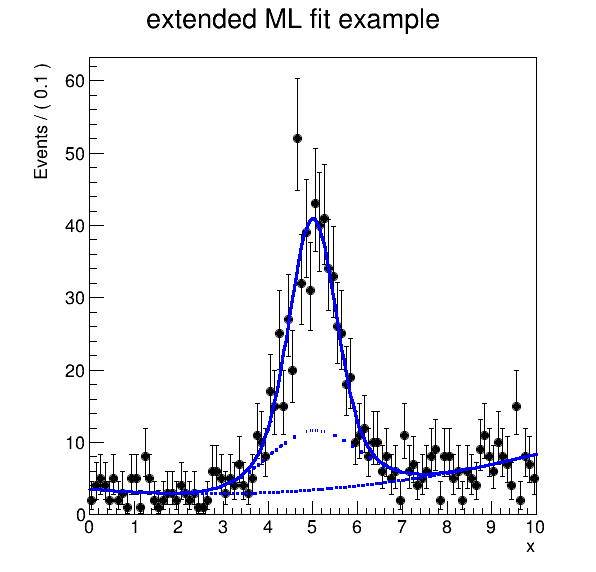

In [16]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()